В данном мини-проекте проведем анализ данных о транзакциях.

Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05) \
name – имя пользователя  \
transaction – статус транзакции  \
minute* – сколько минут прошло с начала дня  \
 *Доступна в данных с 5 шага.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим датасет transaction_data.csv. Проверим размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
df = pd.read_csv('C:/Users/yarus/projects/transaction_data.csv')
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [4]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Пропущенные значения в таблице отсутствуют.

Выясним какие значения и в каком количестве находятся в колонке transaction. 

In [5]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [6]:
transaction_df = df.transaction.value_counts()
transaction_df

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

Визуализируем результат с помощью барплота. 

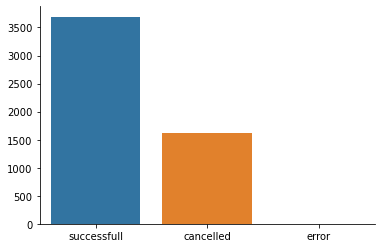

In [7]:
sns.barplot(x=transaction_df.index, y=transaction_df.values)
sns.despine()

Сделаем график более привлекательным.

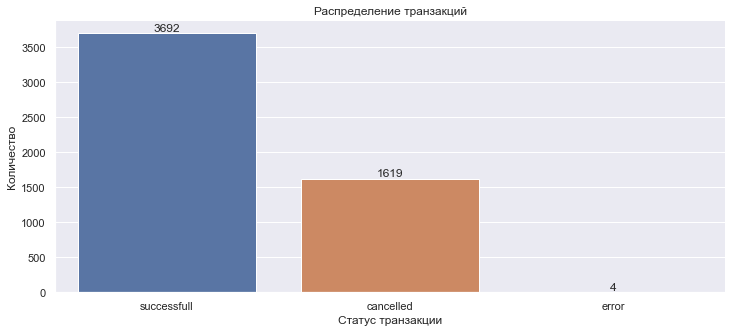

In [8]:
sns.set(rc = {'figure.figsize':(12,5)})
ax = sns.barplot(x=transaction_df.index, y=transaction_df.values)
ax.set_xlabel("Статус транзакции")
ax.set_ylabel("Количество")
ax.set_title("Распределение транзакций") 
ax.bar_label(ax.containers[0])
sns.despine()

Можно заметить, что 4 транзакции завершились ошибкой.

Выясним сколько транзакций осуществил каждый из пользователей. Осуществлёнными будем считать транзакции со значением "successfull".

In [9]:
successfull_df = df.loc[df.transaction == 'successfull'].groupby('name', as_index=False).size()
successfull_df.head()

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


Посмотрим на характеристики распределения, где

по оси x – число транзакций \
по оси y – доля пользователей с таким числом транзакций

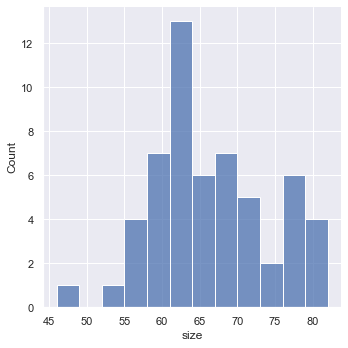

In [10]:
sns.set(rc = {'figure.figsize':(12,5)})
sns.displot(data=successfull_df, x='size', bins=12)
sns.despine()

In [11]:
successfull_df.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


Пользователи в среднем совершили примерно по 66 транзакций.  \
Максимальное число транзакций – 82.   \
Примерно 25% пользователей совершили менее 61 транзакции.

К нам пришёл коллега с немного обновленными данными. Посмотрим на них.

In [12]:
df_2 = pd.read_csv('C:/Users/yarus/projects/transaction_data_updated.csv', parse_dates=['date'])
df_2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
 3   minute       5315 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 166.2+ KB


Построим сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей \
строки – минута времени осуществления операции (minute) \
значения – число совершённых операций   

In [14]:
df_minutes = df_2.groupby(['name', 'minute'], as_index=False).size()
df_minutes.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [15]:
user_vs_minute_pivot = df_minutes.pivot(index='minute', columns='name', values='size')
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


Пропущенные значения заполним нулями. 

In [16]:
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки.

по оси x – минута транзакции (сколько минут прошло с начала дня)  \
по оси y – число транзакций

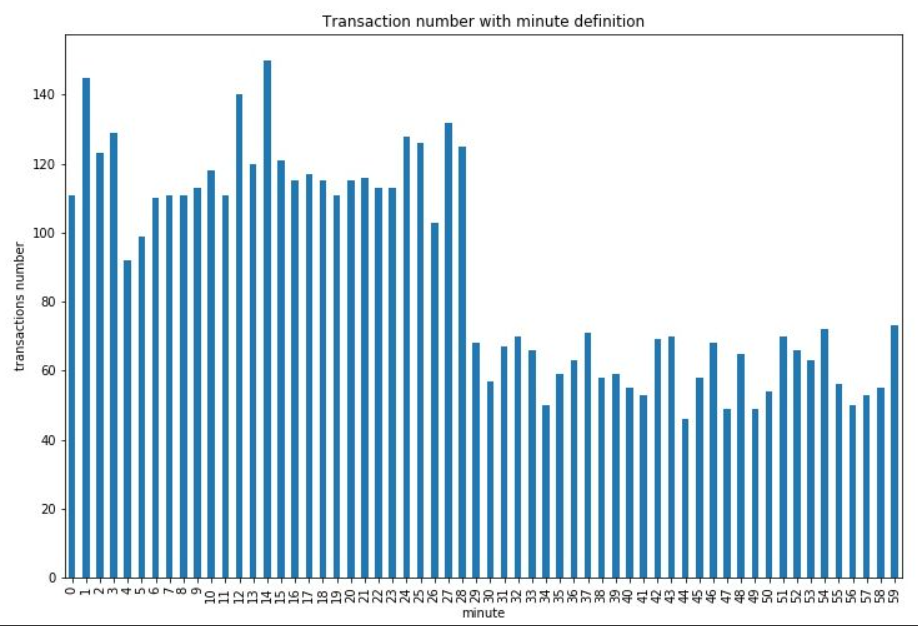

Изучим представленный график. 

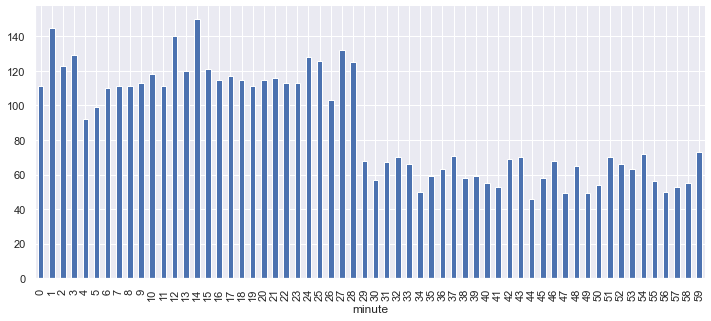

In [17]:
minute_trans = user_vs_minute_pivot.sum(axis=1)
minute_trans.plot.bar(figsize=(12, 5))
sns.despine()

In [18]:
df_2.date.describe(datetime_is_numeric=True)

count                             5315
mean     2020-03-02 00:43:56.628974592
min                2020-03-02 00:00:00
25%         2020-03-02 00:21:50.500000
50%                2020-03-02 00:43:26
75%         2020-03-02 01:06:22.500000
max                2020-03-02 01:29:05
Name: date, dtype: object

В данных закралась ошибка, извлекли минутную часть времени, а не число минут с начала дня. Исправим её и сохраним правильное число минут, прошедших с начала дня, в колонку true_minute.

In [19]:
df_2['true_minute'] = df_2.date.dt.minute + df_2.date.dt.hour * 60
df_2.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


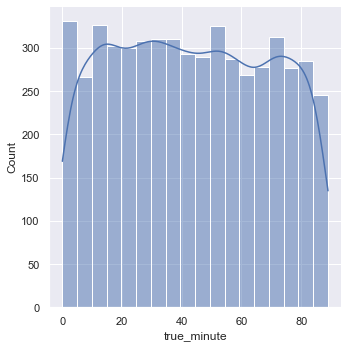

In [20]:
sns.set(rc = {'figure.figsize':(12,5)})
sns.displot(data=df_2, x='true_minute', kde=True)
sns.despine()